# Configuration

In [1]:
drop_locality_data = False
run_knn = False
run_knn_hyperparameter_error_plot = False
save_figs = False

# Initialization

In [2]:
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix
from datetime import datetime, timedelta
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

plt.rcParams.update(
    {
        'font.size': 18,
        'savefig.dpi': 150,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    }
)


households_df = pd.read_csv('./ITAASER2019HOUSEHOLD.csv', dtype={
    'AREA': 'object',
    'VCODE': 'object',
    'HHID': 'object',
    'H002': 'object',
})

households_df = households_df.astype({
    'H003': 'bool',
    'H004': 'bool',
    'H005': 'bool',
    'H006': 'bool',
    'H007': 'bool',
    'H008': 'bool',
    'H009': 'bool',
    'H010': 'bool',
    'H011': 'bool',
    'H012': 'bool',
    'HEHSAAS': 'bool',
    'HBISP': 'bool',
    'HPSPA': 'bool',
    'HAKHU': 'bool',
    'HSPO': 'bool',
    'HSPNON': 'bool',
    'H100': 'bool',
    'H101': 'bool'

})

households_df = households_df.rename(columns={
    'AREA': 'area',
    'H001M': 'num_males',
    'H001F': 'num_females',
    'H001': 'num_members',
    'VCODE': 'district_code',
    'H002': 'house_type',
    'H003': 'is_self_owned',
    'H004': 'has_electric_connection',
    'H005': 'is_television_available',
    'H006': 'is_mobile_phone_available',
    'H007': 'is_smart_phone_available',
    'H008': 'is_car_available',
    'H009': 'is_motorcycle_available',
    'H010': 'is_computer_available',
    'H011': 'is_solar_panel_available',
    'H012': 'is_internet_connection_available',
    'HEHSAAS': 'is_ehsaas_recepient',
    'HBISP': 'is_bisp_recepient',
    'HPSPA': 'is_pspa_recepient',
    'HAKHU': 'is_akhuwat_recepient',
    'HSPO': 'is_other_ssn_recepient',
    'HSPNON': 'is_ssn_recepient',
    'H100': 'uses_sms',
    'H101': 'uses_whatsapp'

})

households_df['house_type'] = households_df['house_type'].map({
    '1': 'kutcha',
    '2': 'semi-pucca',
    '3': 'pucca'
})


parents_df = pd.read_csv('./ITAASER2019PARENT.csv', dtype={
    'AREA': 'object',
    'VCODE': 'object',
    'PR005': 'object',
    'PR010': 'object',
    'PRID': 'object'
    # Create a column for years of education
})

parents_df = parents_df.astype({
    'PR004': 'bool',
    'PR006': 'bool',
    'PR009': 'bool',
    'PR011': 'bool',
})

parents_df = parents_df.rename(columns={
    'AREA': 'area',
    'VCODE': 'district_code',
    'PR001': 'mother_age',
    'PR002': 'num_surviving_children_younger_than_17',
    'PR003': 'num_surviving_children_elder_than_17',
    'PR004': 'has_mother_ever_attended_school',
    'PR005': 'mother_max_grade',
    'PR006': 'is_mother_education_more_than_5_grades',
    'PR009': 'has_father_ever_attended_school',
    'PR010': 'father_max_grade',
    'PR011': 'is_father_education_more_than_5_grades',
})




parents_df = parents_df.drop(columns=['num_surviving_children_younger_than_17', 'num_surviving_children_elder_than_17'])


children_df = pd.read_csv('./ITAASER2019CHILD.csv', dtype={
    'AREA': 'object',
    'VCODE': 'object',
    'PRID': 'object',
    'CID': 'object',
    'HHID': 'object',
    'C002': 'object',
    'C003': 'object',
    'C003a': 'object',
    'C003b': 'object',
    'C004': 'object',
    'C005': 'object',
    'C006': 'object',
    'C010': 'object',
    'C011': 'object',
    'C012': 'object',
    'C013': 'object',
})




children_df = children_df.astype({
    'C008a': 'bool',
    'C010a': 'bool',
    'C010b': 'bool',
    'C012a': 'bool',
    'C012b': 'bool',
    'C012c': 'bool',
    'C014': 'bool',
    'C015': 'bool',
    'C016': 'bool',
    'C017': 'bool',
    'C018': 'bool',
    'C019': 'bool',    
})

children_df = children_df.rename(columns={
    'AREA': 'area',
    'VCODE': 'district_code',
    'C001': 'age',
    'C002': 'gender',
    'C003': 'educational_status',
    'C003a': 'reason_for_dropout',
    'C003b': 'reason_for_non_enrollment',
    'C004': 'max_grade_if_dropout',
    'C005': 'current_grade',
    'C006': 'current_institution_type',
    'C007': 'is_enrolled_in_survey_school',
    'C008a': 'is_taking_tuition_currently',
    'C008b': 'current_tuition_fee',
    'C010': 'basic_learning_level',
    'C010a': 'basic_learning_level_q1_correct',
    'C010b': 'basic_learning_level_q1_correct',
    'C011': 'basic_learning_level_test_language',
    'C012': 'arithmetic_levels',
    'C012a': 'arithmetic_level_word_problem_1_correct',
    'C012b': 'arithmetic_level_word_problem_2_correct',
    'C012c': 'arithmetic_level_word_problem_3_correct',
    'C013': 'english_reading_level',
    'C013a': 'english_reading_level_bonus_question_1_correct',
    'C013b': 'english_reading_level_bonus_question_2_correct',
    'C014': 'english_knows_word_meanings',
    'C015': 'english_knows_sentence_meanings',
    'C016': 'general_knowledge_knows_english_poem',
    'C017': 'general_knowledge_english_q2_correct',
    'C018': 'general_knowledge_english_figures_recognition',
    'C019': 'is_child_present_in_household'
})

children_df['reason_for_dropout'] = children_df['reason_for_dropout'].map({
    '1': 'Law and Order',
    '2': 'Poverty',
    '3': 'Flood',
    '4': 'School building shifted by govt.',
    '5': 'Illness',
    '6': 'Migration',
    '7': 'Others'
})

children_df['reason_for_non_enrollment'] = children_df['reason_for_non_enrollment'].map({
    '1': 'Law and Order',
    '2': 'Poverty',
    '3': 'Flood',
    '4': 'School building shifted by govt.',
    '5': 'Illness',
    '6': 'Migration',
    '7': 'Others'
})

children_df['is_currently_enrolled'] = children_df['educational_status'] == '3'


enrolled_children_df = children_df[children_df['educational_status'] == '3']
dropout_children_df = children_df[children_df['educational_status'] == '2']
never_enrolled_children_df = children_df[children_df['educational_status'] == '1']

print(enrolled_children_df.shape)
print(dropout_children_df.shape)
print(never_enrolled_children_df.shape)


schools_df = pd.read_csv('./ITAASER2019SCHOOLS.csv')

(215094, 36)
(13484, 36)
(60198, 36)


# Helper functions

In [3]:
def map_max_grade_to_years_of_education(df, col_name):
    return df[col_name].map({
     '1': '1',
     '2': '2',
     '3': '3',
     '4': '4',
     '5': '5',
     '6': '6',
     '7': '7',
     '8': '8',
     '9': '9',
     '10': '10',
     'Alim/Hafiz/Madrassah': '10',
     'B.Ed/M.Ed': '14',
     'BACHELORS': '14',
     'CT': '14',
     'GRADUATE': '14',
     'INTERMEDIATE': '12',
     'M PHIL': '18',
     'MASTERS': '16',
     'MPHIL': '18',
     'PHD': '20'
    }).astype('float').astype('Int64')

# Households

In [4]:
print(households_df.shape)
households_df.head()

(104272, 29)


,SYEAR,area,RNAME,DNAME,district_code,HHID,HCOUNTER,num_males,num_females,num_members,house_type,is_self_owned,has_electric_connection,is_television_available,is_mobile_phone_available,is_smart_phone_available,is_car_available,is_motorcycle_available,is_bisp_recepient,is_ehsaas_recepient,is_pspa_recepient,is_akhuwat_recepient,is_other_ssn_recepient,is_computer_available,is_solar_panel_available,is_internet_connection_available,is_ssn_recepient,uses_sms,uses_whatsapp
0,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,1,1.0,2.0,NaN,2.0,semi-pucca,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,True
1,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,2,2.0,4.0,4.0,4.0,semi-pucca,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,True,True
2,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,3,3.0,NaN,NaN,NaN,kutcha,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,4,4.0,3.0,2.0,3.0,semi-pucca,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,5,5.0,4.0,2.0,4.0,semi-pucca,True,True,True,True,False,True,True,False,False,True,False,False,False,False,False,True,True,True


# Schools

In [5]:
print(schools_df.shape)
schools_df.head()

(7252, 124)


,SYEAR,AREA,RNAME,DNAME,VCODE,STYPE,SID,S001,S002,S003,S004,S004t,S004g,S004b,S004V,S004H,S004P,S004I,S004BHV,S004MUL,S004FR,S004FT,S004FHO,S004FO,S006,S006a,S007E,S007P,S008TA,S008TP,S009a,S009b,S009c,S009d,S009e,S009f,S009z,S010a,S010b,S010c,S010d,S010e,S010z,S010T0,S010T15,S010T30,S010T31,S011a,S011b,S011c,S011d,S011e,S011e1,S011f,S011g,S011k,S011m,S011n,S011q,S011n.1,S011p,S012a,S012b,S012c,S012d,S012e,S012f,S012g,S012h,S012j,S012k,S012L,S012m,SF0,S014,S015,S016,S017,S0181,S0181a,S0182,S0182a,S018PVT1,S018PVT2,S018PVT3,S018PVT4,S018PVT5,S018PVT6,S019a1,S019b1,S019c1,S019d1,S019e1,S019f1,S019g1,S019h1,S019i1,S019j1,S019k1,S019m1,S019n1,S019p1,S019q1,S019r1,S019s1,S019t1,S019a2,S019b2,S019c2,S019d2,S019e2,S019f2,S019g2,S019h2,S019i2,S019j2,S019k2,S019m2,S019n2,S019p2,S019q2,S019r2,S019s2,S019t2
0,2019,1,BALOCHISTAN,KHUZDAR,NaN,1,1,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,162.0,145.0,9.0,9.0,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,BALOCHISTAN,KHUZDAR,NaN,1,2,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,84.0,76.0,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"3,4",NaN,NaN,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,BALOCHISTAN,KHUZDAR,NaN,1,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,126.0,117.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"3,4",NaN,NaN,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,BALOCHISTAN,KHUZDAR,NaN,1,4,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,84.0,76.0,4.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,"3,4",NaN,NaN,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,BALOCHISTAN,KHUZDAR,NaN,1,5,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,48.0,42.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,"3,4",NaN,NaN,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Children

In [6]:
print(children_df.shape)
children_df.head()

(288776, 36)


,SYEAR,area,RNAME,DNAME,district_code,HHID,HCOUNTER,PRID,CID,age,gender,educational_status,reason_for_dropout,reason_for_non_enrollment,max_grade_if_dropout,current_grade,current_institution_type,C020,is_taking_tuition_currently,current_tuition_fee,basic_learning_level,basic_learning_level_q1_correct,basic_learning_level_q1_correct,basic_learning_level_test_language,arithmetic_levels,arithmetic_level_word_problem_1_correct,arithmetic_level_word_problem_2_correct,arithmetic_level_word_problem_3_correct,english_reading_level,english_knows_word_meanings,english_knows_sentence_meanings,general_knowledge_knows_english_poem,general_knowledge_english_q2_correct,general_knowledge_english_figures_recognition,is_child_present_in_household,is_currently_enrolled
0,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,1,1.0,1,1,6,1,3,NaN,NaN,NaN,1,1,1.0,True,600.0,1,True,True,1,1,False,False,False,1,True,True,True,True,True,True,True
1,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,2,2.0,2,2,14,1,3,NaN,NaN,NaN,9,2,0.0,False,NaN,5,True,True,1,6,True,True,True,4,True,True,True,True,True,True,True
2,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,2,2.0,2,3,12,0,3,NaN,NaN,NaN,5,2,0.0,False,NaN,2,True,True,1,5,False,False,False,5,True,False,True,True,True,True,True
3,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,2,2.0,2,4,8,0,3,NaN,NaN,NaN,3,2,0.0,False,NaN,3,True,True,1,6,False,False,False,3,True,True,True,True,True,True,True
4,2019,2,AZAD JAMMU AND KASHMIR,BAGH,92,2,2.0,2,5,4,1,3,NaN,NaN,NaN,PG,2,0.0,False,NaN,NaN,True,True,NaN,NaN,True,True,True,NaN,True,True,True,True,True,True,True


# Parents

In [7]:
print(parents_df.shape)
parents_df.head()

(106197, 15)


,area,RNAME,DNAME,district_code,HHID,HCOUNTER,PRID,mother_age,has_mother_ever_attended_school,mother_max_grade,is_mother_education_more_than_5_grades,PR008,has_father_ever_attended_school,father_max_grade,is_father_education_more_than_5_grades
0,2,AZAD JAMMU AND KASHMIR,BAGH,92,1,1.0,1,25.0,False,NaN,True,50.0,True,8,True
1,2,AZAD JAMMU AND KASHMIR,BAGH,92,2,2.0,2,36.0,False,NaN,True,38.0,True,10,True
2,2,AZAD JAMMU AND KASHMIR,BAGH,92,3,3.0,3,34.0,False,NaN,True,37.0,False,NaN,True
3,2,AZAD JAMMU AND KASHMIR,BAGH,92,4,4.0,4,34.0,False,NaN,True,36.0,False,NaN,True
4,2,AZAD JAMMU AND KASHMIR,BAGH,92,5,5.0,5,40.0,True,NaN,True,45.0,True,NaN,True


# Respondents' Opinion - Dropping Out

Total responses: 9771


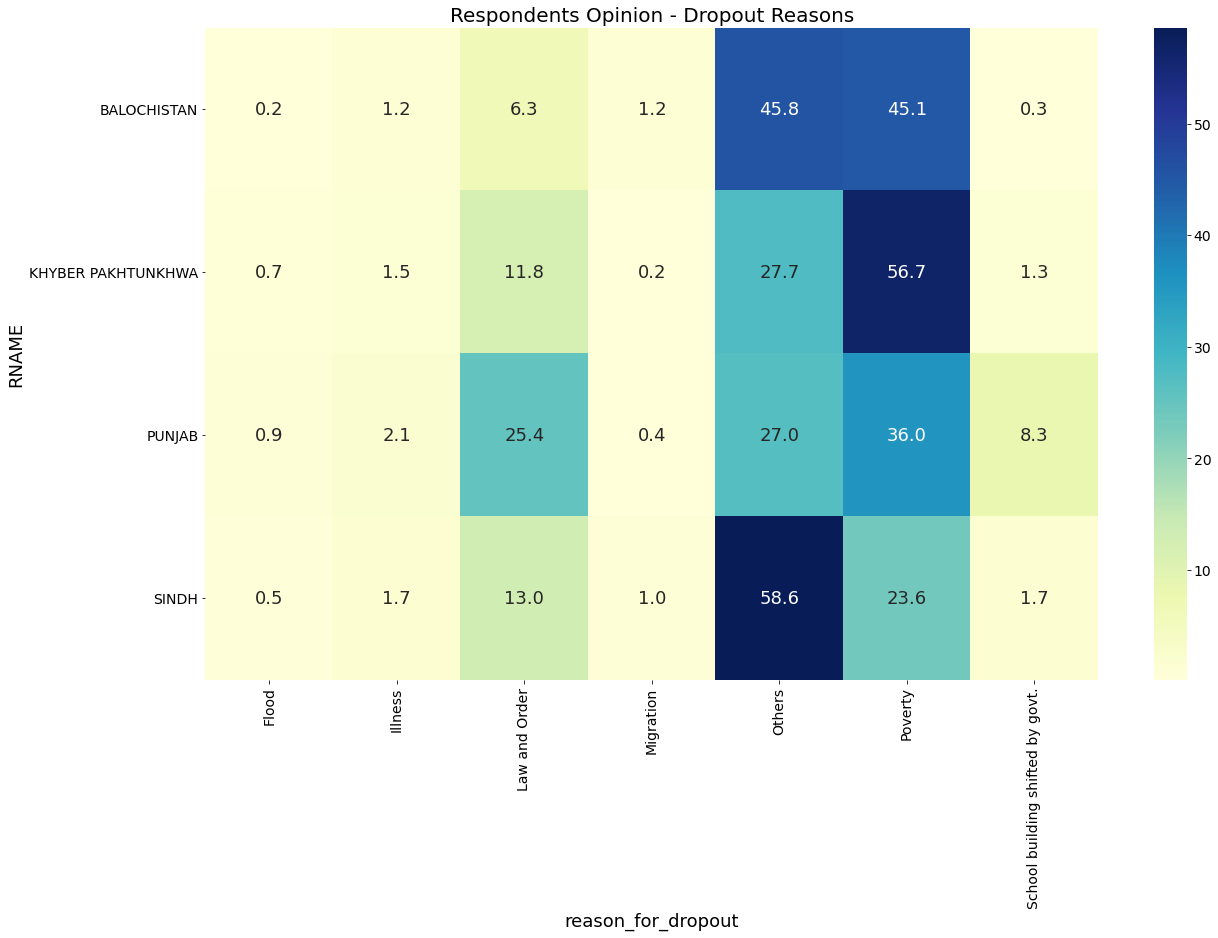

In [8]:
dropout_reasons_grouped_df = children_df[children_df['RNAME'] != 'ISLAMABAD - ICT'].groupby(['RNAME', 'reason_for_dropout'], as_index=False).count()
rname_fill_counts = children_df.dropna(subset=['reason_for_dropout']).RNAME.value_counts()

percentage_dropout_reasons_grouped_df = dropout_reasons_grouped_df
percentage_dropout_reasons_grouped_df['total_fills'] = percentage_dropout_reasons_grouped_df['RNAME'].apply(lambda x: rname_fill_counts[x])
percentage_dropout_reasons_grouped_df['percentage_fills'] = (percentage_dropout_reasons_grouped_df['CID'] / percentage_dropout_reasons_grouped_df['total_fills'])*100



pivot_df = pd.pivot_table(percentage_dropout_reasons_grouped_df,'percentage_fills','RNAME','reason_for_dropout')

plt.subplots(figsize=(20, 12))
ax = sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt='.1f')
print(f'Total responses: {np.sum(rname_fill_counts)}')
plt.title('Respondents Opinion - Dropout Reasons', fontsize=20)
if save_figs:
    plt.savefig('./figures/respondents_opinion_dropout_reasons')

Total responses: 9771


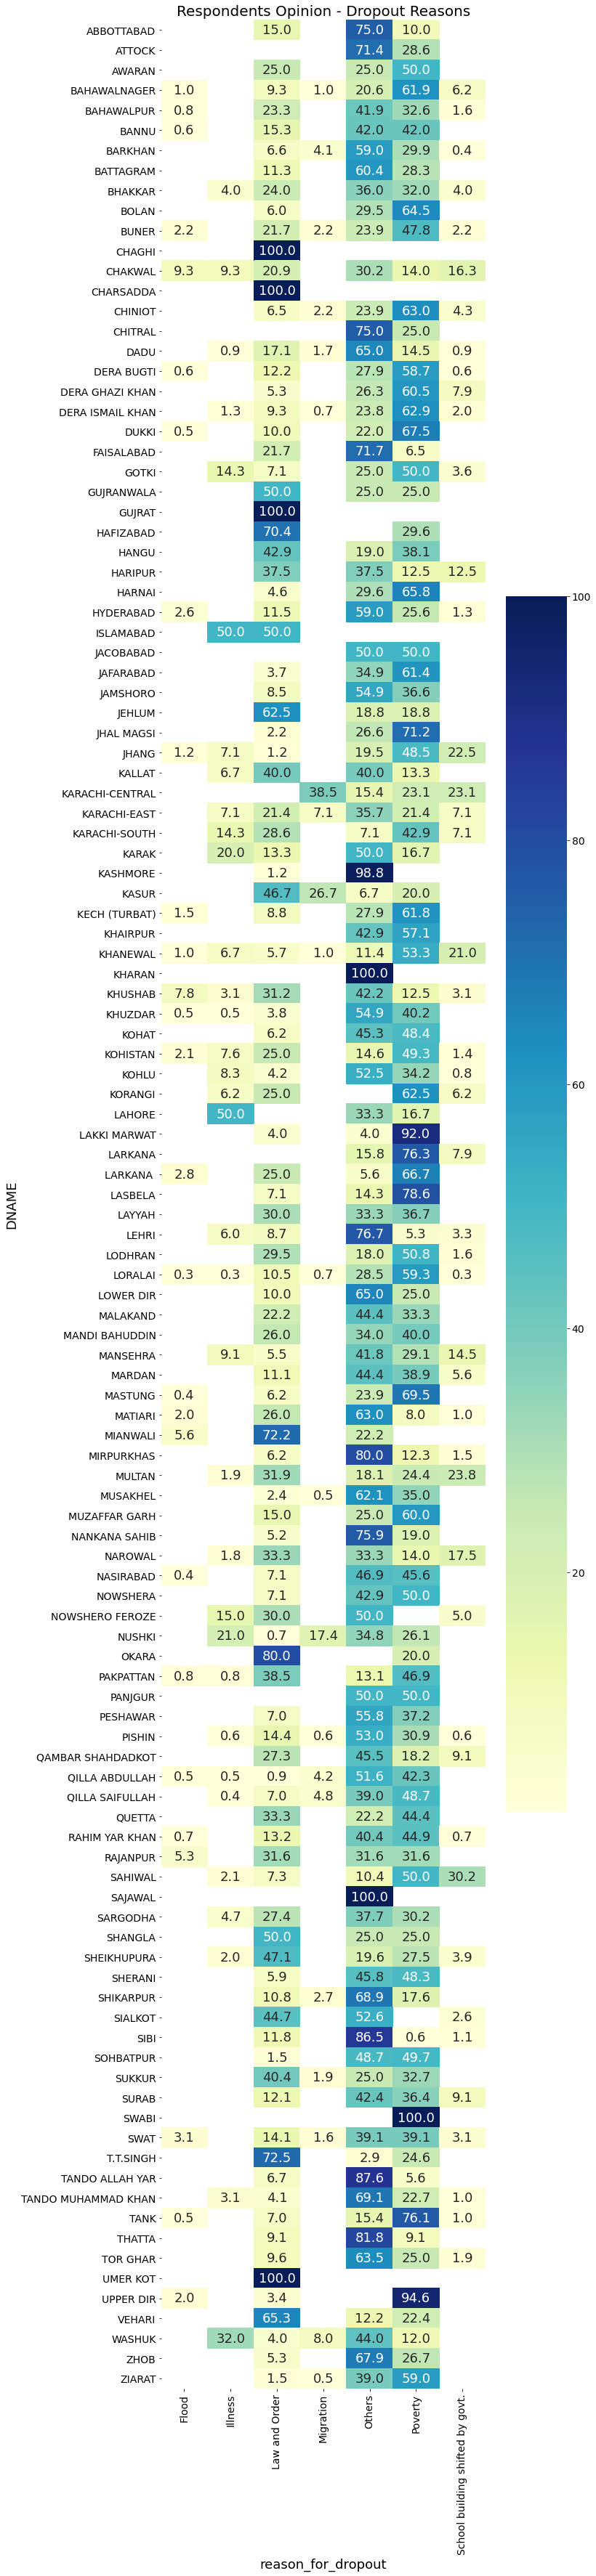

In [9]:
dropout_reasons_grouped_df = children_df.groupby(['DNAME', 'reason_for_dropout'], as_index=False).count()
rname_fill_counts = children_df.dropna(subset=['reason_for_dropout']).DNAME.value_counts()

percentage_dropout_reasons_grouped_df = dropout_reasons_grouped_df
percentage_dropout_reasons_grouped_df['total_fills'] = percentage_dropout_reasons_grouped_df['DNAME'].apply(lambda x: rname_fill_counts[x])
percentage_dropout_reasons_grouped_df['percentage_fills'] = (percentage_dropout_reasons_grouped_df['CID'] / percentage_dropout_reasons_grouped_df['total_fills'])*100



pivot_df = pd.pivot_table(percentage_dropout_reasons_grouped_df,'percentage_fills','DNAME','reason_for_dropout')

plt.subplots(figsize=(10, 60))
ax = sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt='.1f')
print(f'Total responses: {np.sum(rname_fill_counts)}')
plt.title('Respondents Opinion - Dropout Reasons', fontsize=20)
plt.savefig('./figures/respondents_opinion_dropout_reasons')

# Respondents' Opinion - Non Enrollment

Total Responses: 40662


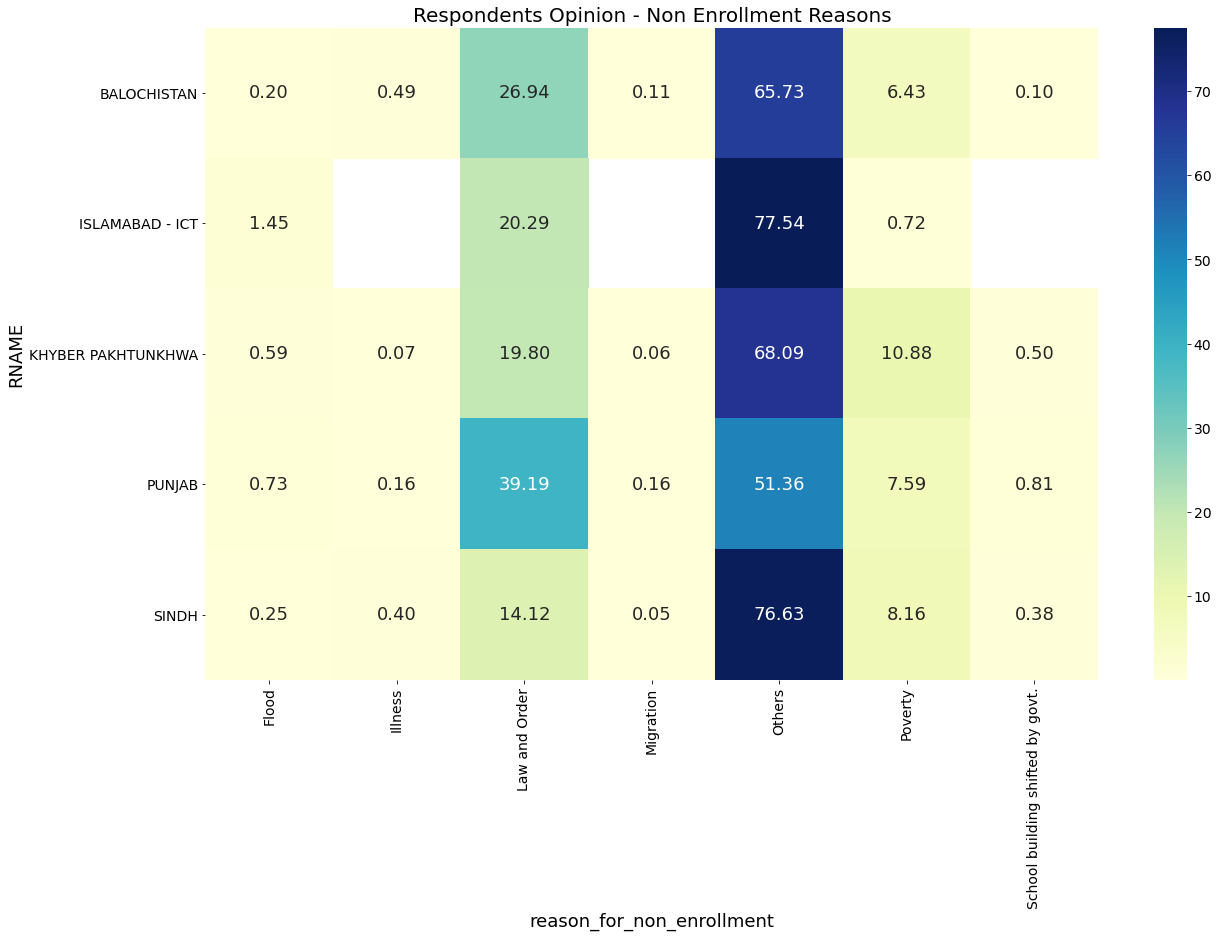

In [10]:
non_enrollment_reasons_grouped_df = children_df.groupby(['RNAME', 'reason_for_non_enrollment'], as_index=False).count()
rname_fill_counts = children_df.dropna(subset=['reason_for_non_enrollment']).RNAME.value_counts()

percentage_dropout_reasons_grouped_df = non_enrollment_reasons_grouped_df
percentage_dropout_reasons_grouped_df['total_fills'] = percentage_dropout_reasons_grouped_df['RNAME'].apply(lambda x: rname_fill_counts[x])
percentage_dropout_reasons_grouped_df['percentage_fills'] = (percentage_dropout_reasons_grouped_df['CID'] / percentage_dropout_reasons_grouped_df['total_fills'])*100

pivot_df = pd.pivot_table(percentage_dropout_reasons_grouped_df,'percentage_fills','RNAME','reason_for_non_enrollment')

plt.subplots(figsize=(20, 12))
ax = sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt='.2f')

print(f'Total Responses: {np.sum(rname_fill_counts)}')

plt.title('Respondents Opinion - Non Enrollment Reasons', fontsize=20)
if save_figs:
    plt.savefig('./figures/respondents_opinion_non_enrollment_reasons')

# Finding out the main factors for enrollment

In [11]:
children_households_df = pd.merge(households_df,children_df, on='HHID', suffixes=('_hh','_ch'))
children_parents_df = pd.merge(children_df, parents_df, on='PRID')
children_households_parents_df = pd.merge(children_households_df, parents_df, on='PRID', suffixes=('_chh', '_pr'))

# Remove columns that give us context on a child's education. 
# Wouldn't be a useful predictive model if it needs information about a child's
# performance in language and arithmetic questions
trimmed_children_households_parents_df = children_households_parents_df.drop(columns=['SYEAR_ch','area_ch','RNAME_ch','DNAME_ch',
                                                                     'district_code_ch', 'HCOUNTER_ch','reason_for_dropout',
                                                                     'reason_for_non_enrollment','max_grade_if_dropout',
                                                                     'current_grade', 'current_institution_type',
                                                                     "C020", "is_taking_tuition_currently", 
                                                                      "current_tuition_fee", "basic_learning_level", 
                                                                      "basic_learning_level_q1_correct", 
                                                                      "basic_learning_level_q1_correct", 
                                                                      "basic_learning_level_test_language", 
                                                                      "arithmetic_levels", "arithmetic_level_word_problem_1_correct",
                                                                      "arithmetic_level_word_problem_2_correct", 
                                                                      "arithmetic_level_word_problem_3_correct", "english_reading_level",
                                                                      "english_knows_word_meanings", "english_knows_sentence_meanings",
                                                                      "general_knowledge_knows_english_poem", "general_knowledge_english_q2_correct",
                                                                      "general_knowledge_english_figures_recognition", 
                                                                      "is_child_present_in_household", "HHID_pr", "HCOUNTER",
                                                                      "PR008", "district_code_hh", "HCOUNTER_hh", "SYEAR_hh",
                                                                      "HHID_chh", "PRID", "CID", "area_hh", "district_code",
                                                                      "RNAME_hh", "DNAME_hh"
                                                                                     ])


trimmed_children_households_parents_df = trimmed_children_households_parents_df \
                                                        .dropna(subset=['gender', 'house_type', 'area'], how='any')

print(trimmed_children_households_parents_df.shape)
print(trimmed_children_households_parents_df.is_currently_enrolled.value_counts())
print(trimmed_children_households_parents_df.is_currently_enrolled.value_counts())

children_households_parents_df[children_households_parents_df['is_currently_enrolled']==False].isna().mean().sort_values(ascending=False)






(287920, 36)
True     214383
False     73537
Name: is_currently_enrolled, dtype: int64
True     214383
False     73537
Name: is_currently_enrolled, dtype: int64


current_institution_type                         1.000000
C020                                             1.000000
current_grade                                    1.000000
current_tuition_fee                              0.999932
reason_for_dropout                               0.867390
max_grade_if_dropout                             0.849502
mother_max_grade                                 0.741850
num_females                                      0.692435
num_males                                        0.677710
num_members                                      0.677669
arithmetic_levels                                0.512948
english_reading_level                            0.511930
father_max_grade                                 0.509840
basic_learning_level                             0.504723
basic_learning_level_test_language               0.504642
reason_for_non_enrollment                        0.448142
mother_age                                       0.286501
PR008         

# Imputing Values

In [12]:
trimmed_children_households_parents_df.isna().mean().sort_values(ascending=False)

num_females                               0.712455
num_males                                 0.697826
num_members                               0.697753
mother_max_grade                          0.638677
father_max_grade                          0.419200
mother_age                                0.231554
house_type                                0.000000
is_self_owned                             0.000000
has_electric_connection                   0.000000
is_other_ssn_recepient                    0.000000
is_mobile_phone_available                 0.000000
is_smart_phone_available                  0.000000
is_car_available                          0.000000
is_motorcycle_available                   0.000000
is_bisp_recepient                         0.000000
is_ehsaas_recepient                       0.000000
is_pspa_recepient                         0.000000
is_akhuwat_recepient                      0.000000
is_television_available                   0.000000
is_father_education_more_than_5

In [13]:
fill_mean = lambda col: col.fillna(col.mean())

cols_to_impute = ['num_members', 'num_females', 'num_males', 'mother_age']

trimmed_children_households_parents_df[cols_to_impute] = trimmed_children_households_parents_df[cols_to_impute].apply(fill_mean, axis=0)

print(trimmed_children_households_parents_df.isna().mean().sort_values())
trimmed_children_households_parents_df.head()

num_males                                 0.000000
has_father_ever_attended_school           0.000000
is_mother_education_more_than_5_grades    0.000000
has_mother_ever_attended_school           0.000000
mother_age                                0.000000
DNAME                                     0.000000
RNAME                                     0.000000
area                                      0.000000
is_currently_enrolled                     0.000000
educational_status                        0.000000
gender                                    0.000000
age                                       0.000000
uses_whatsapp                             0.000000
uses_sms                                  0.000000
is_ssn_recepient                          0.000000
is_internet_connection_available          0.000000
is_solar_panel_available                  0.000000
is_mobile_phone_available                 0.000000
num_females                               0.000000
num_members                    

,num_males,num_females,num_members,house_type,is_self_owned,has_electric_connection,is_television_available,is_mobile_phone_available,is_smart_phone_available,is_car_available,is_motorcycle_available,is_bisp_recepient,is_ehsaas_recepient,is_pspa_recepient,is_akhuwat_recepient,is_other_ssn_recepient,is_computer_available,is_solar_panel_available,is_internet_connection_available,is_ssn_recepient,uses_sms,uses_whatsapp,age,gender,educational_status,is_currently_enrolled,area,RNAME,DNAME,mother_age,has_mother_ever_attended_school,mother_max_grade,is_mother_education_more_than_5_grades,has_father_ever_attended_school,father_max_grade,is_father_education_more_than_5_grades
0,2.0,3.032975,2.0,semi-pucca,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,False,True,6,1,3,True,2,AZAD JAMMU AND KASHMIR,BAGH,25.0,False,NaN,True,True,8,True
1,4.0,4.000000,4.0,semi-pucca,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,True,True,14,1,3,True,2,AZAD JAMMU AND KASHMIR,BAGH,36.0,False,NaN,True,True,10,True
2,4.0,4.000000,4.0,semi-pucca,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,True,True,12,0,3,True,2,AZAD JAMMU AND KASHMIR,BAGH,36.0,False,NaN,True,True,10,True
3,4.0,4.000000,4.0,semi-pucca,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,True,True,8,0,3,True,2,AZAD JAMMU AND KASHMIR,BAGH,36.0,False,NaN,True,True,10,True
4,4.0,4.000000,4.0,semi-pucca,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,True,True,4,1,3,True,2,AZAD JAMMU AND KASHMIR,BAGH,36.0,False,NaN,True,True,10,True


# How parents influence the enrollment of children in school?

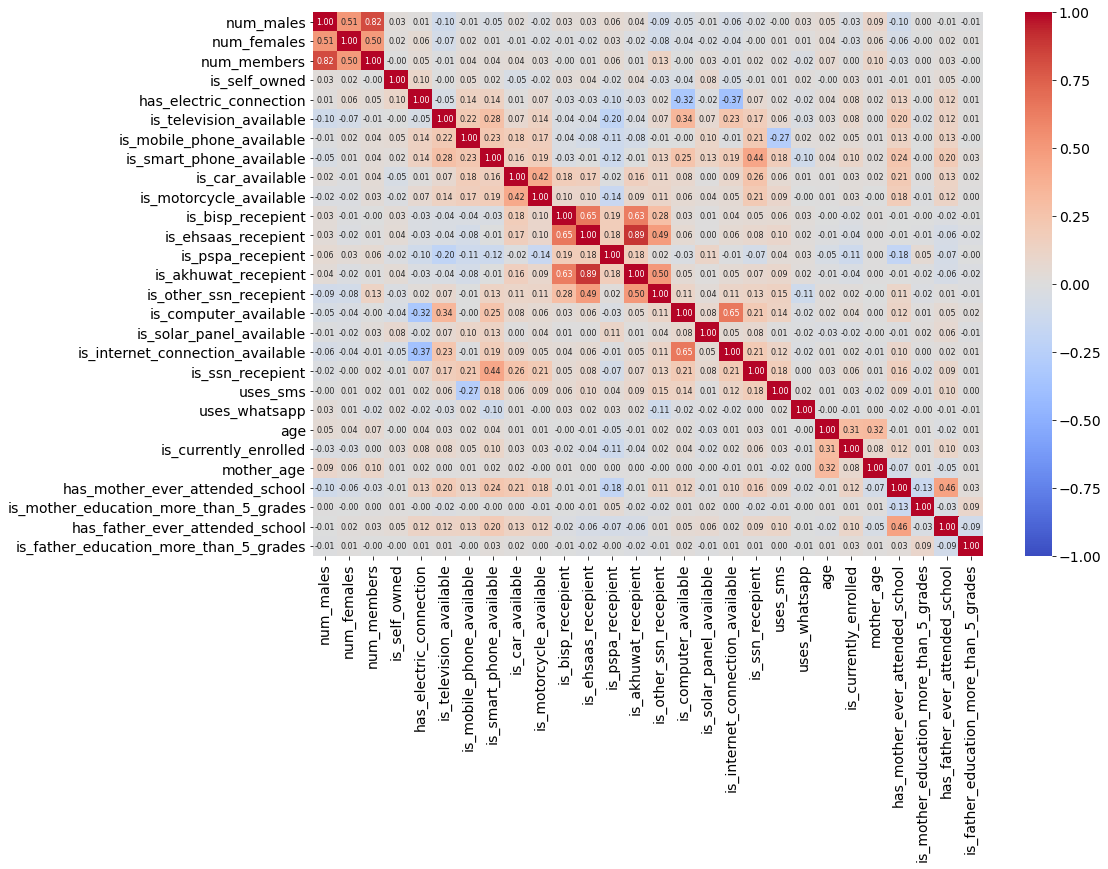

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
corr_columns = ['has_electric_connection', 'is_television_available']
sns.heatmap(
    trimmed_children_households_parents_df.corr(), 
    ax=ax, 
    annot=True, 
    annot_kws={"size": 8}, 
    fmt='.2f', 
    cmap="coolwarm",
    vmin=-1,
    vmax=1)

trimmed_children_households_parents_df['has_mother_ever_attended_school'].value_counts()

if save_figs:
    plt.savefig('./figures/data_correlation', dpi=300, bbox_inches='tight')

In [15]:
def encode_cat_col(df, col_name, dummy_na=True):
    encoded_df = pd.get_dummies(df[col_name], prefix=col_name, dummy_na=dummy_na)
    return pd.concat([df.drop(col_name, axis=1), encoded_df], axis=1)

if drop_locality_data:
    encoded_df = trimmed_children_households_parents_df.drop(columns=['RNAME','DNAME','area'])
else:
    encoded_df = encode_cat_col(trimmed_children_households_parents_df, 'RNAME')
    encoded_df = encode_cat_col(encoded_df, 'DNAME')


encoded_df = encode_cat_col(encoded_df, 'house_type')
encoded_df = encode_cat_col(encoded_df, 'mother_max_grade')
encoded_df = encode_cat_col(encoded_df, 'father_max_grade')
encoded_df = encode_cat_col(encoded_df, 'gender')
encoded_df = encode_cat_col(encoded_df, 'area')

print(encoded_df.shape)
encoded_df.head()
encoded_df.isna().mean()

(287920, 255)


num_males                                     0.0
num_females                                   0.0
num_members                                   0.0
is_self_owned                                 0.0
has_electric_connection                       0.0
is_television_available                       0.0
is_mobile_phone_available                     0.0
is_smart_phone_available                      0.0
is_car_available                              0.0
is_motorcycle_available                       0.0
is_bisp_recepient                             0.0
is_ehsaas_recepient                           0.0
is_pspa_recepient                             0.0
is_akhuwat_recepient                          0.0
is_other_ssn_recepient                        0.0
is_computer_available                         0.0
is_solar_panel_available                      0.0
is_internet_connection_available              0.0
is_ssn_recepient                              0.0
uses_sms                                      0.0


In [16]:
endoded_df_sample = encoded_df #.sample(n=50000, random_state=1)

X = endoded_df_sample.drop(columns=[
    'educational_status',
    'is_currently_enrolled'
])
y = endoded_df_sample['educational_status']



if run_knn:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=30)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=16, n_jobs=-1)
    classifier.fit(X_train, y_train)


    y_pred = classifier.predict(X_test)

    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True)



In [17]:
error = []

# Calculating error for K values between 1 and 40

if run_knn_hyperparameter_error_plot:
    for i in range(1, 40, 1):
        print(f'Start knn with k={i}')
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))

        from sklearn.metrics import classification_report, confusion_matrix
        print(confusion_matrix(y_test, pred_i))
        print(classification_report(y_test, pred_i))

        print(f'error:{np.mean(pred_i != y_test)}')




    plt.figure(figsize=(12, 6))
    plt.plot(range(1,40,1), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')

How Location/Districts contribute to children being in school


(287920, 255)
Accuracy: 0.8077590997499305


array([[ -3.56603778,  -3.04039705,  -3.76894926, ...,  -1.49709148,
         -1.61190788,   0.        ],
       [ -3.56603778,  -3.04039705,  -3.76894926, ...,   8.16878557,
        -11.27778493,   0.        ],
       [ -3.56603778,  -3.04039705,  -3.76894926, ...,  -1.49709148,
         -1.61190788,   0.        ],
       ...,
       [ -3.33050554,  -3.07363719,  -3.98085846, ...,  -1.49709148,
         -1.61190788,   0.        ],
       [ -0.6008164 ,  -4.08167789,  -1.6408312 , ...,  -1.49709148,
         -1.61190788,   0.        ],
       [ -4.24040192,  -4.08167789,  -4.76086755, ...,  -1.49709148,
         -1.61190788,   0.        ]])

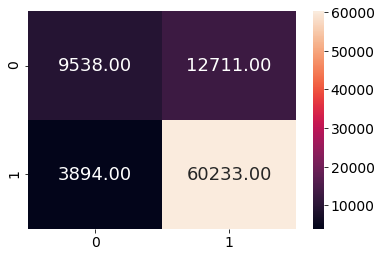

In [18]:
from sklearn.linear_model import LogisticRegression

print(encoded_df.shape)
X = encoded_df.drop(columns=[
    'educational_status',
    'is_currently_enrolled'
])
y = encoded_df['is_currently_enrolled']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=30)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(random_state=10, n_jobs=-1)
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.2f')


# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

scaler.transform(X_train)

In [19]:



def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



coef_df = coef_weights(lr.coef_[0], X_train)

positive_factors_df = coef_df[coef_df['coefs'] > 0]
negative_factors_df = coef_df[coef_df['coefs'] < 0]

coef_df.head()


,est_int,coefs,abs_coefs
21,age,0.921821,0.921821
195,DNAME_ZHOB,-0.237267,0.237267
180,DNAME_SURAB,0.214395,0.214395
63,DNAME_DUKKI,-0.175276,0.175276
125,DNAME_LORALAI,-0.172904,0.172904


# What keeps children in school

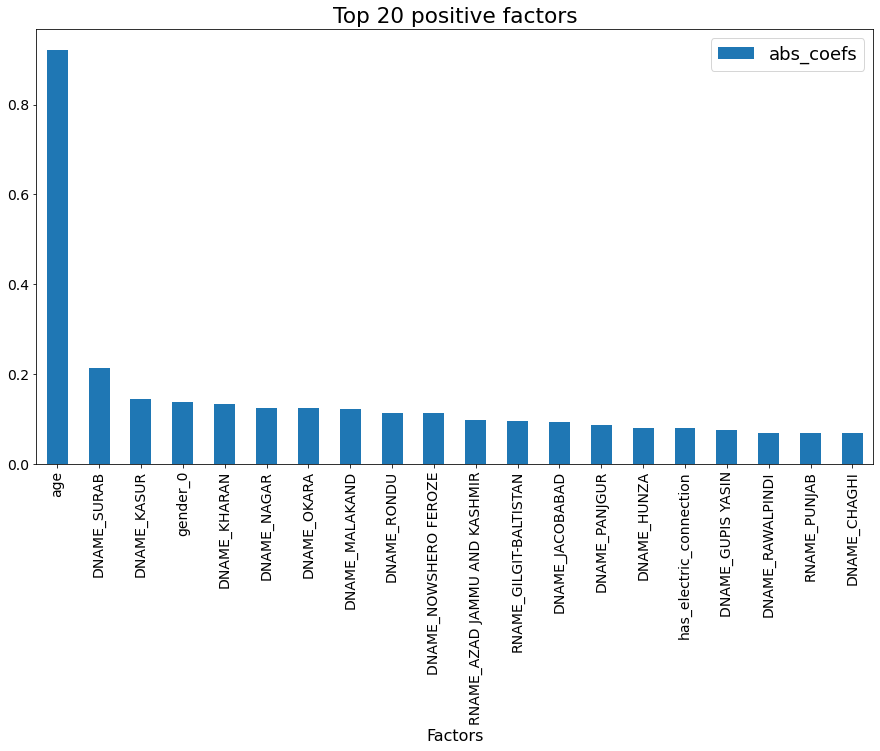

In [20]:
ax = positive_factors_df.iloc[0:20].plot(
    kind='bar', 
    x='est_int', 
    y='abs_coefs', 
    figsize=(15,8), 
    title='Top 20 positive factors')
ax.set_xlabel('Factors', fontsize=16)
if save_figs:
    plt.savefig('./figures/positive_factors_w_location.png', bbox_inches='tight')

# What makes children withdraw from school

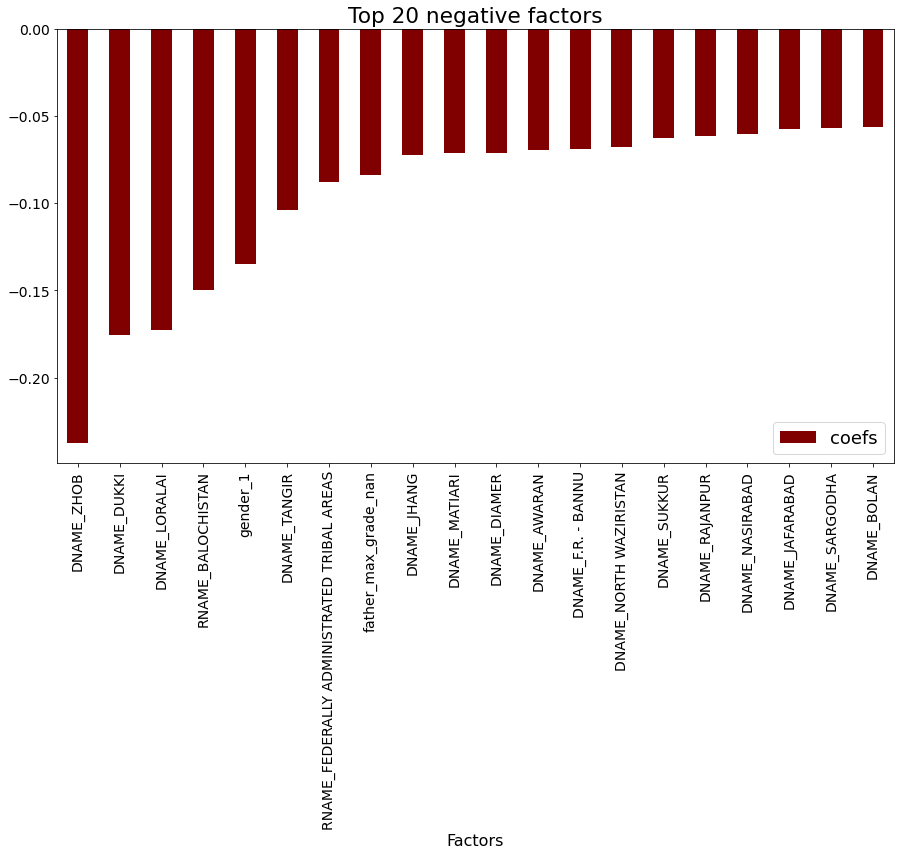

In [21]:
ax = negative_factors_df.iloc[0:20].plot(
        kind='bar', 
        x='est_int', 
        y='coefs', 
        figsize=(15,8), 
        color='maroon', 
        title='Top 20 negative factors')
ax.set_xlabel('Factors', fontsize=16)

if save_figs:
    plt.savefig('./figures/negative_factors_with_location.png', bbox_inches='tight')

# How Aid affects enrollment

<AxesSubplot:xlabel='est_int'>

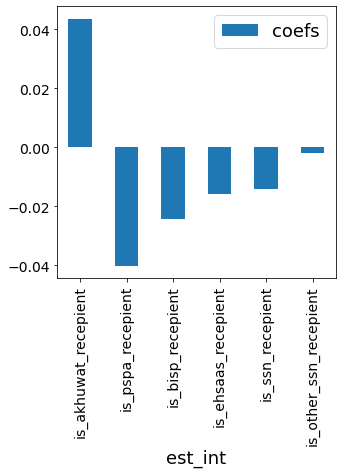

In [22]:
ssn_list = ['is_pspa_recepient', 'is_ssn_recepient', 'is_akhuwat_recepient', 'is_ehsaas_recepient', 'is_other_ssn_recepient', 'is_bisp_recepient']
coef_df[coef_df['est_int'].isin(ssn_list)].plot(kind='bar', x='est_int', y='coefs', figsize=(5,5))


# Age (In School vs Out of School)

In [23]:
in_school_df = encoded_df[encoded_df['is_currently_enrolled']]
out_of_school_df = encoded_df[encoded_df['is_currently_enrolled'] != True]

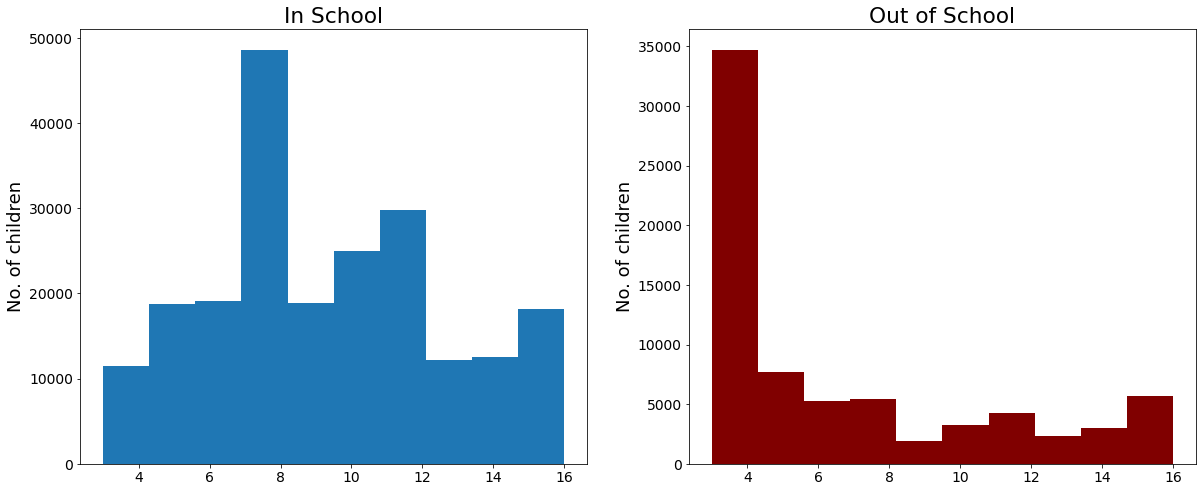

In [24]:
plt.figure(figsize=(20,8))
titles = ['In School', 'Out of School']
colors = [None, 'maroon']
for idx, df in enumerate([in_school_df, out_of_school_df]):
    plt.subplot(1, 2, idx+1)
    plt.title(titles[idx])
    plt.ylabel('No. of children')
    plt.hist(df.age, histtype= 'bar', color=colors[idx])

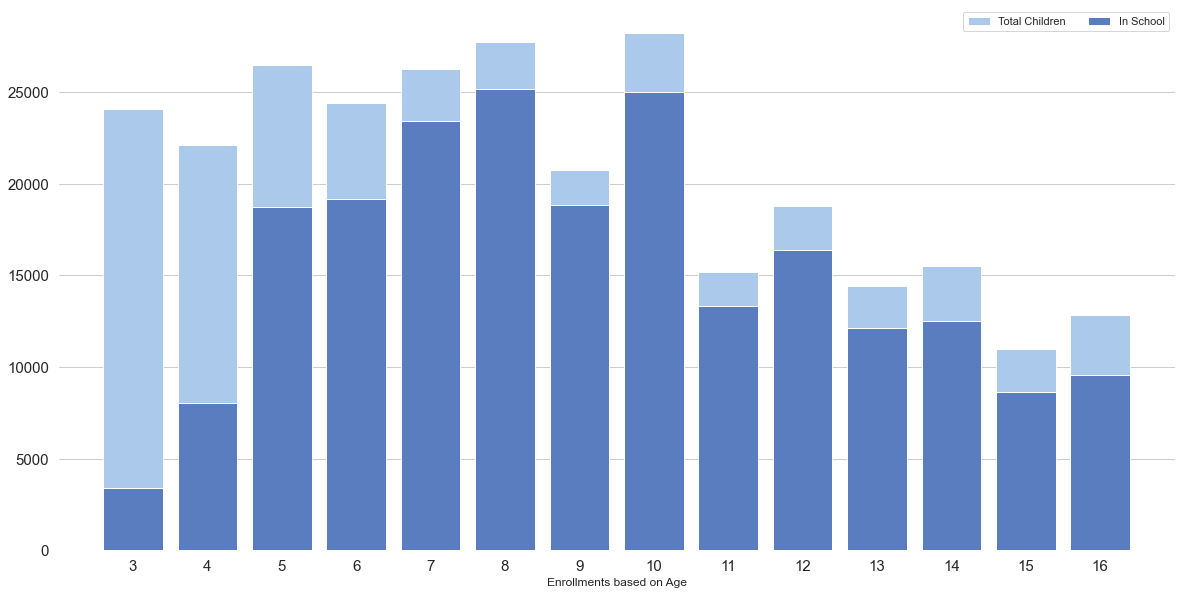

In [25]:
sns.set(style="whitegrid")

in_and_out_of_school = pd.concat(
    [in_school_df['age'].value_counts().rename('in_school'),
     encoded_df['age'].value_counts().rename('total')], axis=1)

f,ax = plt.subplots(figsize=(20, 10))

sns.set_color_codes("pastel")
sns.barplot(x="index", y="total", data=in_and_out_of_school.reset_index(),
            label="Total Children", color="b")

sns.set_color_codes("muted")
sns.barplot(x="index", y="in_school", data=in_and_out_of_school.reset_index(),
            label="In School", color="b")

ax.tick_params(labelsize=15)
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(-1, 14), ylabel="",
       xlabel="Enrollments based on Age")
sns.despine(left=True, bottom=True)

if save_figs:
    plt.savefig('./figures/barplot.png')

In [26]:
coef_df

,est_int,coefs,abs_coefs
21,age,0.921821,0.921821
195,DNAME_ZHOB,-0.237267,0.237267
180,DNAME_SURAB,0.214395,0.214395
63,DNAME_DUKKI,-0.175276,0.175276
125,DNAME_LORALAI,-0.172904,0.172904
28,RNAME_BALOCHISTAN,-0.149593,0.149593
102,DNAME_KASUR,0.144958,0.144958
246,gender_0,0.138319,0.138319
247,gender_1,-0.135137,0.135137
106,DNAME_KHARAN,0.133336,0.133336


# How parents' education affects children's education

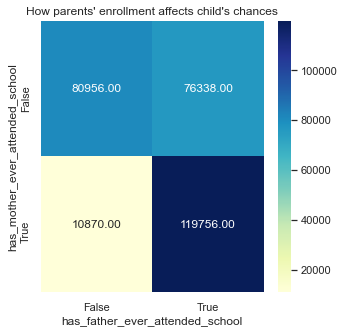

In [27]:
mother_father_attendance = encoded_df[['has_mother_ever_attended_school', 'has_father_ever_attended_school', 'is_currently_enrolled']].groupby(['has_mother_ever_attended_school', 'has_father_ever_attended_school']).count()

pivot_df = pd.pivot_table(mother_father_attendance,'is_currently_enrolled','has_mother_ever_attended_school','has_father_ever_attended_school')

plt.subplots(figsize=(5, 5))
plt.title('How parents\' enrollment affects child\'s chances')
ax = sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt='.2f')


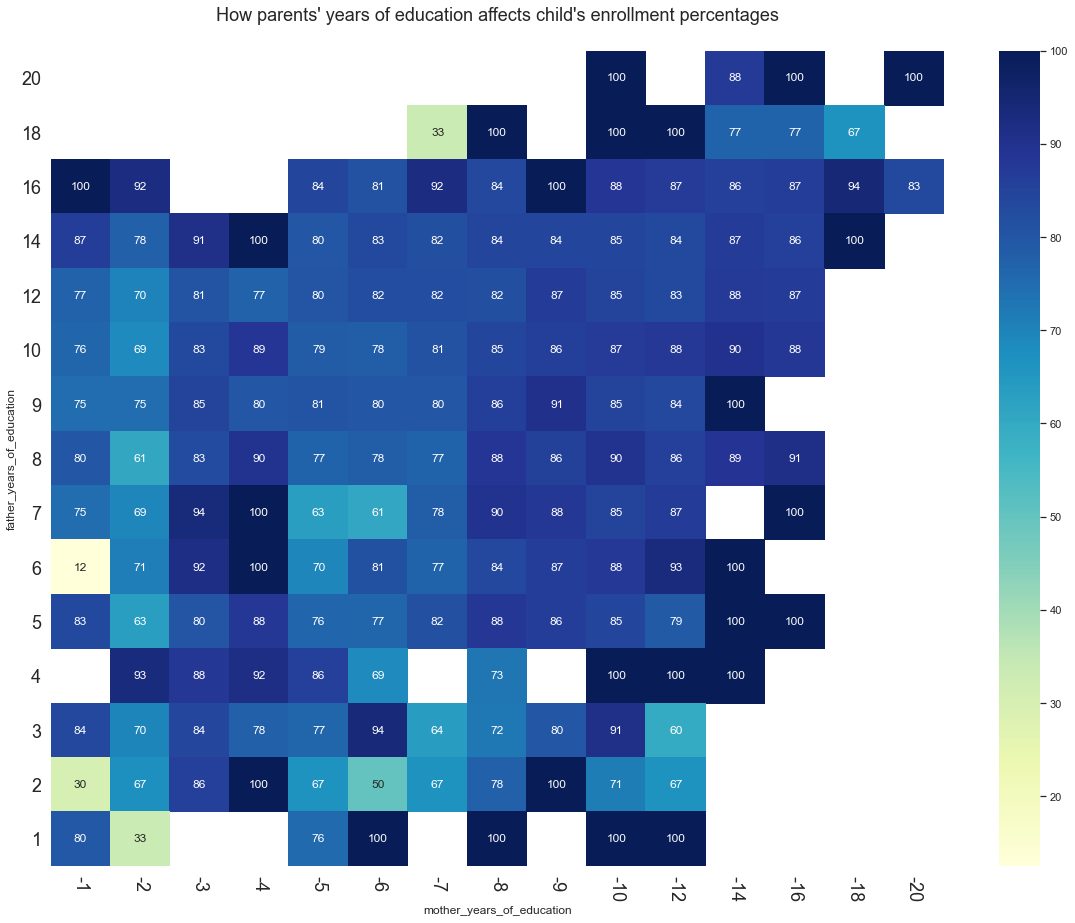

In [28]:
children_households_parents_df['father_years_of_education'] = map_max_grade_to_years_of_education(children_households_parents_df, 'father_max_grade'
children_households_parents_df['mother_years_of_education'] = map_max_grade_to_years_of_education(children_households_parents_df, 'mother_max_grade')

parents_max_grade_df = children_households_parents_df.groupby(['father_years_of_education', 'mother_years_of_education'])['is_currently_enrolled'].value_counts(normalize=True) * 100

parents_max_grade_df = pd.DataFrame(parents_max_grade_df)
parents_max_grade_df = parents_max_grade_df.unstack(2)

parents_max_grade_df['enrolled_percentage'] = parents_max_grade_df[[('is_currently_enrolled', True)]]

pivot_df = pd.pivot_table(parents_max_grade_df, 'enrolled_percentage','father_years_of_education', 'mother_years_of_education')
pivot_df = pivot_df.sort_index(ascending=False)

plt.subplots(figsize=(20, 15))
plt.title('How parents\' years of education affects child\'s enrollment percentages', fontsize=18, pad=30)

ax = sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt='.0f')
ax.tick_params(labelsize=18)
ax.set(xlabel='mother_years_of_education')
plt.yticks(rotation=0)  
plt.xticks(rotation=270)  
if save_figs:
    plt.savefig('./figures/parents_education_vs_child_education.png')
# pivot_df
